In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Sparkling Wine Data Problem Analysis

In [2]:
spark=pd.read_csv('Sparkling.csv',parse_dates=True,index_col=['YearMonth'])

In [3]:
spark.head(5)

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [4]:
spark.index


DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', name='YearMonth', length=187, freq=None)

In [5]:
from pylab import rcParams
rcParams['figure.figsize']=15,7

Text(0.5, 0, 'Fig. No. 1.1.2')

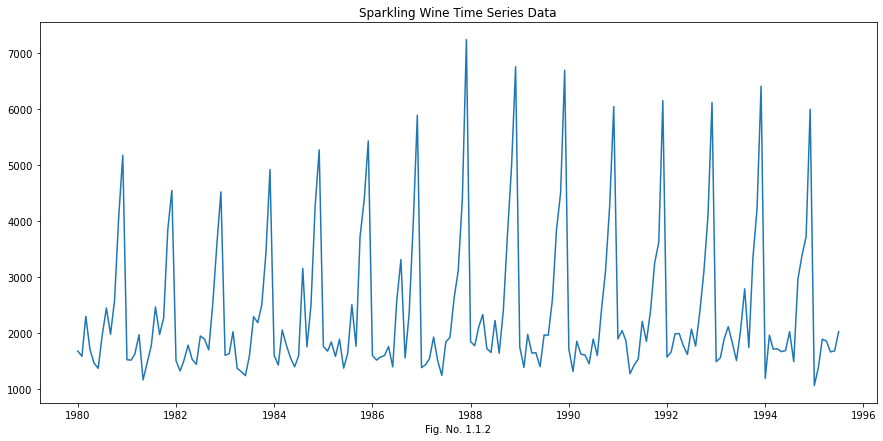

In [6]:
plt.plot(spark)
plt.title('Sparkling Wine Time Series Data')
plt.xlabel('Fig. No. 1.1.2')

In [7]:
spark.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [8]:
spark.describe().T

,count,mean,std,min,25%,50%,75%,max
Sparkling,187.0,2402.417112,1295.11154,1070.0,1605.0,1874.0,2549.0,7242.0


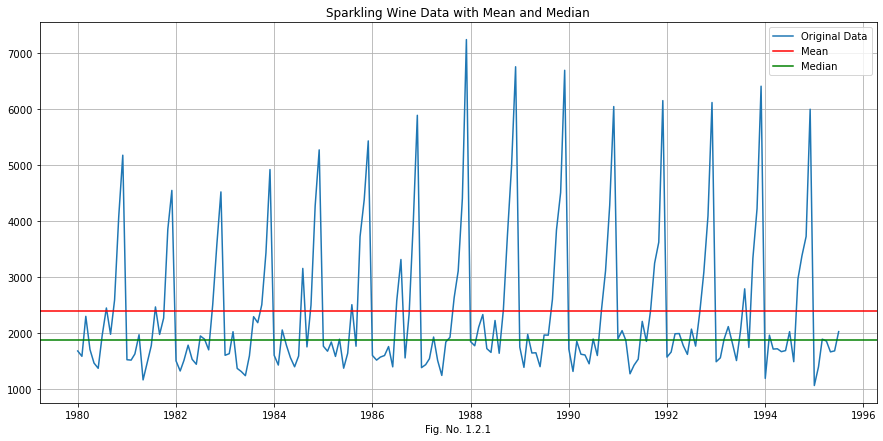

In [9]:
plt.plot(spark,label='Original Data')
plt.axhline(spark['Sparkling'].mean(),color='red',label='Mean')
plt.axhline(spark['Sparkling'].median(),color='green',label='Median')
plt.legend(loc='best')
plt.title('Sparkling Wine Data with Mean and Median')
plt.xlabel('Fig. No. 1.2.1')
plt.grid()

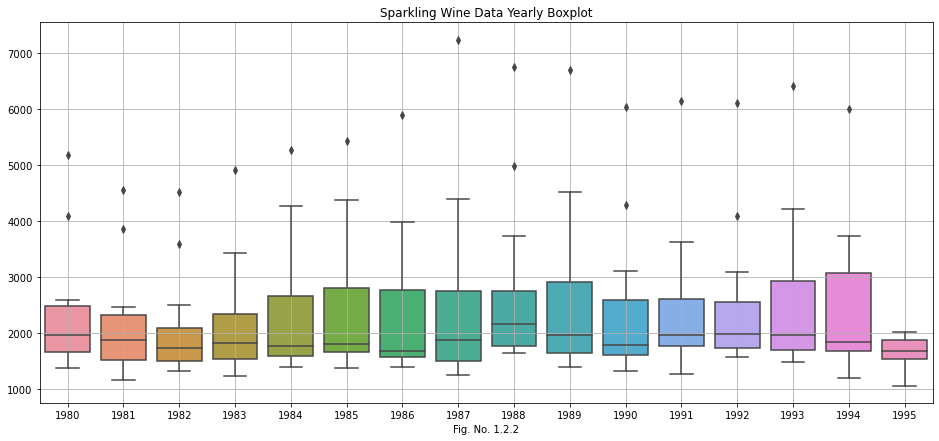

In [10]:
_, ax = plt.subplots(figsize=(16,7))
sns.boxplot(x = spark.index.year,y = spark.values[:,0],ax=ax)
plt.title('Sparkling Wine Data Yearly Boxplot')
plt.xlabel('Fig. No. 1.2.2')
plt.grid();

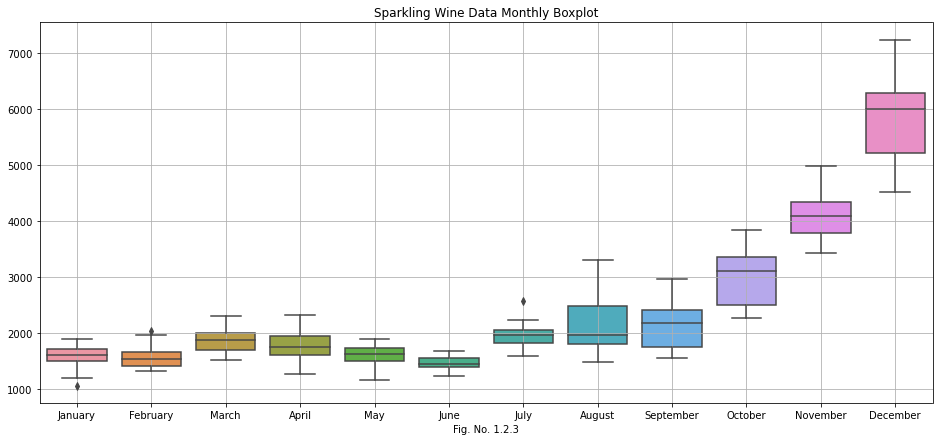

In [11]:
_, ax = plt.subplots(figsize=(16,7))
sns.boxplot(x = spark.index.month_name(),y = spark.values[:,0],ax=ax)
plt.title('Sparkling Wine Data Monthly Boxplot')
plt.xlabel('Fig. No. 1.2.3')
plt.grid();

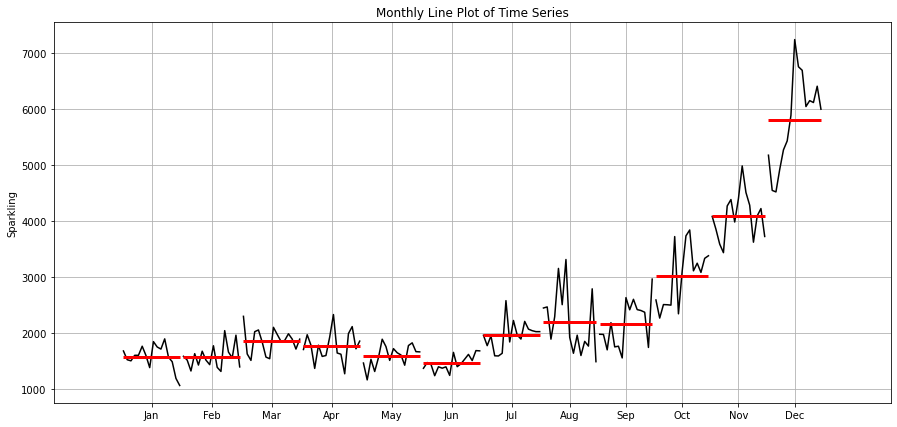

In [12]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(15,7))

month_plot(spark,ylabel='Sparkling',ax=ax)
plt.title('Monthly Line Plot of Time Series')
plt.grid();

In [13]:
monthly_sales_across_years = pd.pivot_table(spark, values = 'Sparkling', columns = spark.index.month_name(), index = spark.index.year)
monthly_sales_across_years

YearMonth,April,August,December,February,January,July,June,March,May,November,October,September
YearMonth,,,,,,,,,,,,
1980,1712.0,2453.0,5179.0,1591.0,1686.0,1966.0,1377.0,2304.0,1471.0,4087.0,2596.0,1984.0
1981,1976.0,2472.0,4551.0,1523.0,1530.0,1781.0,1480.0,1633.0,1170.0,3857.0,2273.0,1981.0
1982,1790.0,1897.0,4524.0,1329.0,1510.0,1954.0,1449.0,1518.0,1537.0,3593.0,2514.0,1706.0
1983,1375.0,2298.0,4923.0,1638.0,1609.0,1600.0,1245.0,2030.0,1320.0,3440.0,2511.0,2191.0
1984,1789.0,3159.0,5274.0,1435.0,1609.0,1597.0,1404.0,2061.0,1567.0,4273.0,2504.0,1759.0
1985,1589.0,2512.0,5434.0,1682.0,1771.0,1645.0,1379.0,1846.0,1896.0,4388.0,3727.0,1771.0
1986,1605.0,3318.0,5891.0,1523.0,1606.0,2584.0,1403.0,1577.0,1765.0,3987.0,2349.0,1562.0
1987,1935.0,1930.0,7242.0,1442.0,1389.0,1847.0,1250.0,1548.0,1518.0,4405.0,3114.0,2638.0
1988,2336.0,1645.0,6757.0,1779.0,1853.0,2230.0,1661.0,2108.0,1728.0,4988.0,3740.0,2421.0


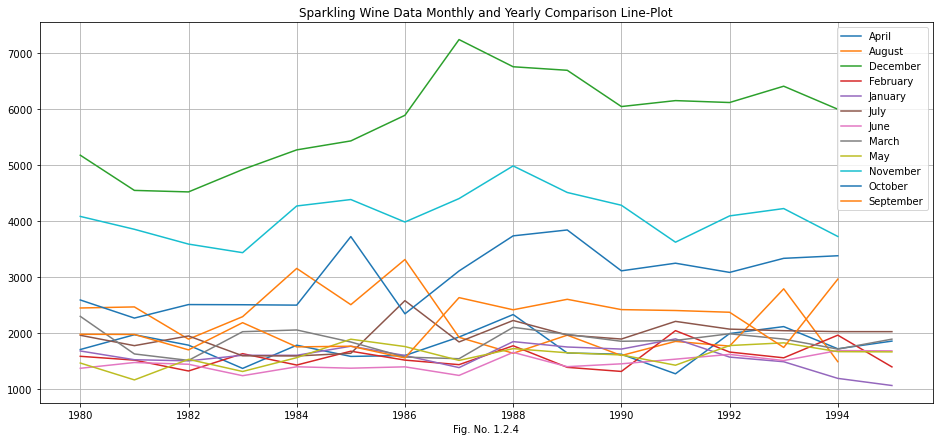

In [14]:
monthly_sales_across_years.plot(figsize=(16,7))
plt.title('Sparkling Wine Data Monthly and Yearly Comparison Line-Plot')
plt.xlabel('Fig. No. 1.2.4')
plt.grid()
plt.legend(loc='best');

### Model Decomposition
#### Additive

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [16]:
spark_add=seasonal_decompose(spark,model='additive')

Text(0.5, 41.99999999999994, 'Additive Decompose for Sparkling Wine Data')

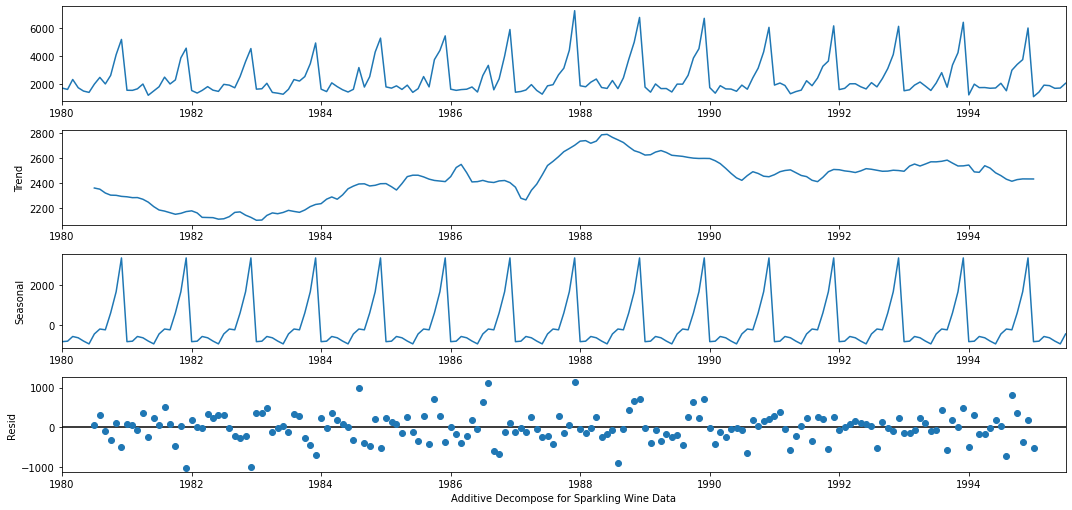

In [17]:
spark_add.plot()
plt.xlabel('Additive Decompose for Sparkling Wine Data')

In [18]:
print(spark_add.trend.head(5))
print(spark_add.seasonal.head(5))
print(spark_add.resid.head(5))

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
Name: trend, dtype: float64
YearMonth
1980-01-01   -854.260599
1980-02-01   -830.350678
1980-03-01   -592.356630
1980-04-01   -658.490559
1980-05-01   -824.416154
Name: seasonal, dtype: float64
YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
Name: resid, dtype: float64


#### Multiplicative

In [19]:
spark_mul=seasonal_decompose(spark,model='multiplicative')

Text(0.5, 41.99999999999994, 'Multiplicative Decompose for Sparkling Wine Data')

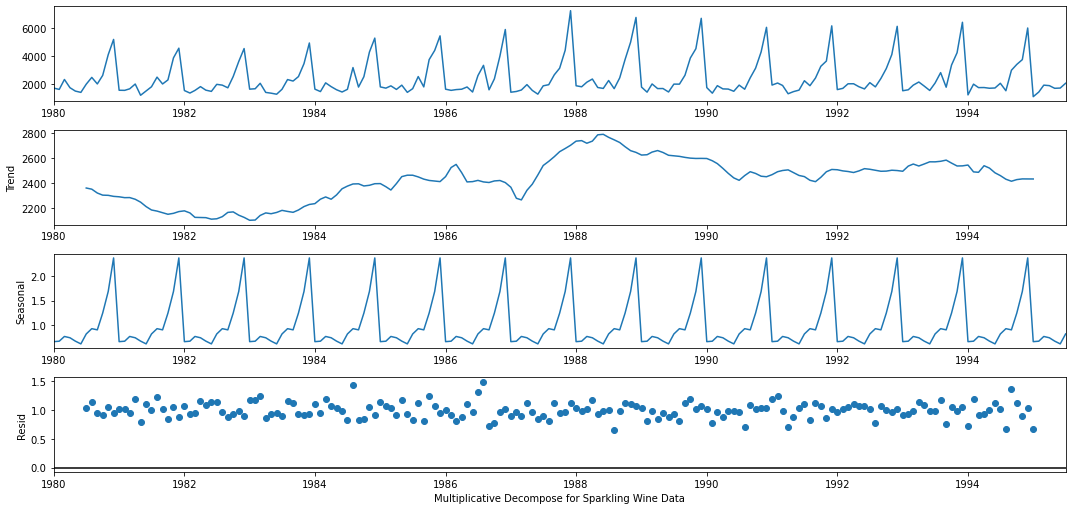

In [20]:
spark_mul.plot();
plt.xlabel('Multiplicative Decompose for Sparkling Wine Data')

In [21]:
print(spark_mul.trend.head(5))
print(spark_mul.seasonal.head(5))
print(spark_mul.resid.head(5))

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
Name: trend, dtype: float64
YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
Name: seasonal, dtype: float64
YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
Name: resid, dtype: float64


### Split the Data into Test and Train Set

In [22]:
train=spark[spark.index<'1991']
test=spark[spark.index>='1991']

In [23]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [24]:
print('Top 5 Rows of Train Data\n',train.head(5))
print('Top 5 Rows of Test Data\n',test.head(5))

Top 5 Rows of Train Data
             Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471
Top 5 Rows of Test Data
             Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432


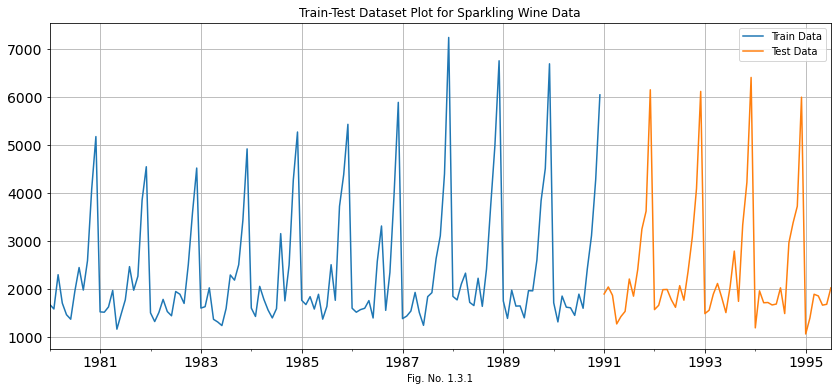

In [25]:
train['Sparkling'].plot(figsize=(14,6), fontsize=14)
test['Sparkling'].plot(figsize=(14,6), fontsize=14)
plt.grid()
plt.legend(['Train Data','Test Data'])
plt.title('Train-Test Dataset Plot for Sparkling Wine Data')
plt.xlabel('Fig. No. 1.3.1')
plt.show()

### Model 1 Linear Regression

In [26]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [27]:
from sklearn.linear_model import LinearRegression
LinearRegression_train=train.copy()
LinearRegression_test=test.copy()

In [28]:
LinearRegression_train['time']=train_time
LinearRegression_test['time']=test_time

In [29]:
lr=LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train.Sparkling)

LinearRegression()

In [30]:
print('Top 5 Rows for Linear Regression Test')
LinearRegression_test.head(5)

Top 5 Rows for Linear Regression Test


,Sparkling,time
YearMonth,,
1991-01-01,1902,133
1991-02-01,2049,134
1991-03-01,1874,135
1991-04-01,1279,136
1991-05-01,1432,137


In [31]:
print('Top 5 Rows for Linear Regression Train')
LinearRegression_train.head(5)

Top 5 Rows for Linear Regression Train


,Sparkling,time
YearMonth,,
1980-01-01,1686,1
1980-02-01,1591,2
1980-03-01,2304,3
1980-04-01,1712,4
1980-05-01,1471,5


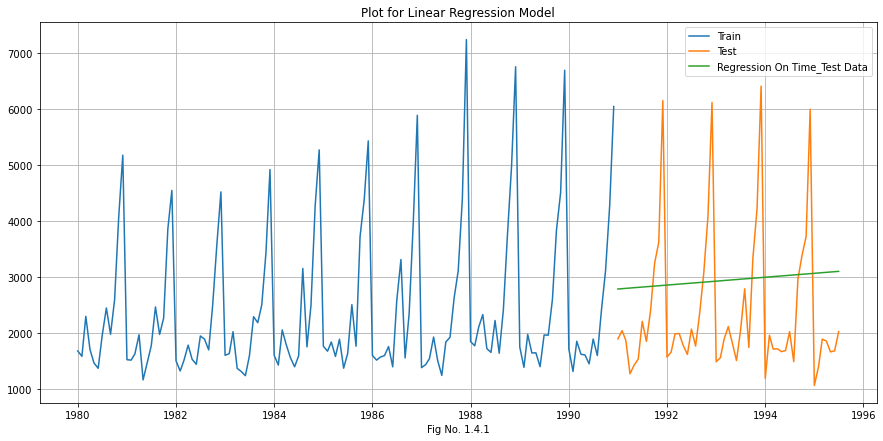

In [32]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(15,7))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.title('Plot for Linear Regression Model')
plt.xlabel('Fig No. 1.4.1')
plt.legend(loc='best')
plt.grid();

### Model Evaluation

In [33]:
from sklearn import metrics

In [34]:
rmse_lr_test=metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
result_lr=pd.DataFrame({'Test RMSE':[rmse_lr_test]},index=['RegressionOnTime'])
result_lr

,Test RMSE
RegressionOnTime,1389.135175


### Naive Approach

In [35]:
Naive_Bayes_Train=train.copy()
Naive_Bayes_Test=test.copy()

In [36]:
last_train_value=np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
Naive_Bayes_Test['Naive']=last_train_value

In [37]:
Naive_Bayes_Train.tail()

,Sparkling
YearMonth,
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116
1990-11-01,4286
1990-12-01,6047


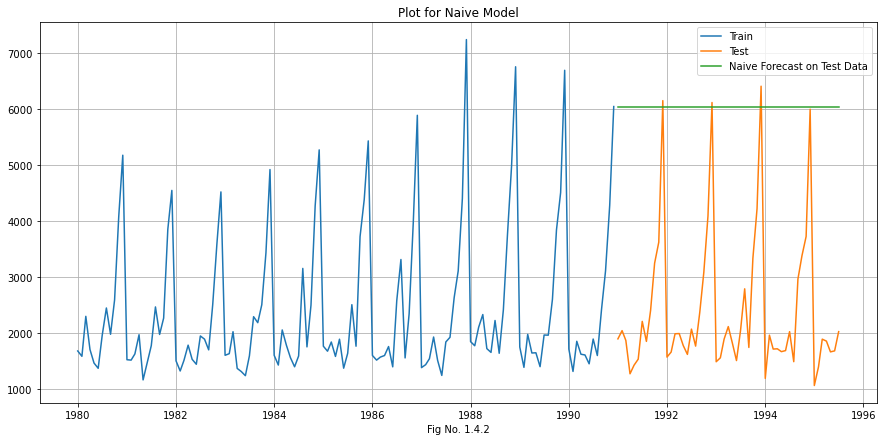

In [38]:
plt.figure(figsize=(15,7))
plt.plot(Naive_Bayes_Train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(Naive_Bayes_Test['Naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title('Plot for Naive Model')
plt.xlabel('Fig No. 1.4.2')
plt.grid();

### Model Evaluation

In [39]:
## Test Data - RMSE
rmse_naive_test=metrics.mean_squared_error(test['Sparkling'],Naive_Bayes_Test['Naive'],squared=False)
result_naive=pd.DataFrame({'Test RMSE':[rmse_naive_test]},index=['NaiveOnTime'])
result_df=pd.concat([result_lr,result_naive])
result_df

,Test RMSE
RegressionOnTime,1389.135175
NaiveOnTime,3864.279352


### Simple Average

In [40]:
Simple_Average_Train=train.copy()
Simple_Average_Test=test.copy()

In [41]:
Simple_Average_Test['Avg']=train['Sparkling'].mean()

In [42]:
Simple_Average_Test.head(5)

,Sparkling,Avg
YearMonth,,
1991-01-01,1902,2403.780303
1991-02-01,2049,2403.780303
1991-03-01,1874,2403.780303
1991-04-01,1279,2403.780303
1991-05-01,1432,2403.780303


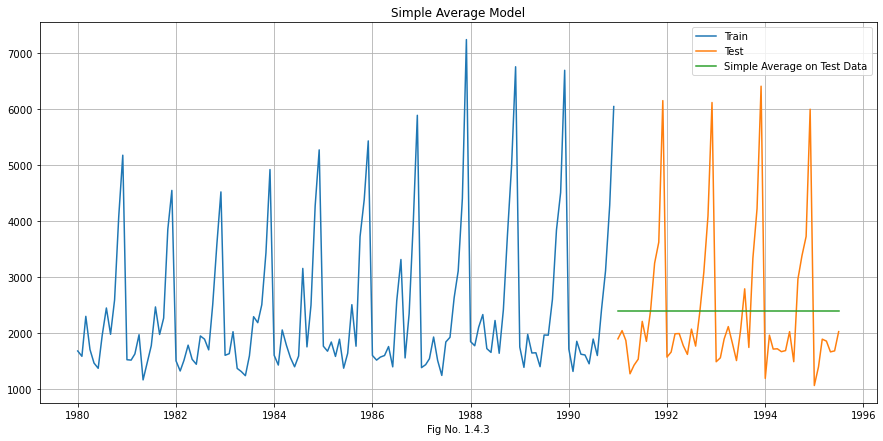

In [43]:
plt.figure(figsize=(15,7))
plt.plot(Simple_Average_Train['Sparkling'], label='Train')
plt.plot(Simple_Average_Test['Sparkling'], label='Test')
plt.plot(Simple_Average_Test['Avg'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Model")
plt.xlabel('Fig No. 1.4.3')
plt.grid();

### Model Evaluation

In [44]:
## Test Data - RMSE
rmse_simple_test=metrics.mean_squared_error(test['Sparkling'],Simple_Average_Test['Avg'],squared=False)
result_simple=pd.DataFrame({'Test RMSE':[rmse_simple_test]},index=['SimpleAverage'])
result_df1=pd.concat([result_df,result_simple])
result_df1

,Test RMSE
RegressionOnTime,1389.135175
NaiveOnTime,3864.279352
SimpleAverage,1275.081804


### Moving Average

In [45]:
Moving_Average=spark.copy()

In [46]:
Moving_Average['Trailing2']=Moving_Average['Sparkling'].rolling(2).mean()
Moving_Average['Trailing4']=Moving_Average['Sparkling'].rolling(4).mean()
Moving_Average['Trailing6']=Moving_Average['Sparkling'].rolling(6).mean()
Moving_Average['Trailing9']=Moving_Average['Sparkling'].rolling(9).mean()

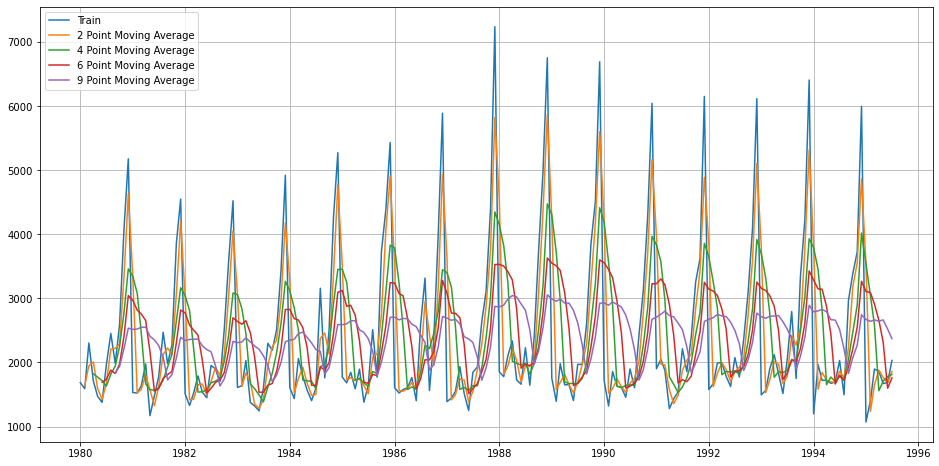

In [47]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(Moving_Average['Sparkling'], label='Train')
plt.plot(Moving_Average['Trailing2'], label='2 Point Moving Average')
plt.plot(Moving_Average['Trailing4'], label='4 Point Moving Average')
plt.plot(Moving_Average['Trailing6'],label = '6 Point Moving Average')
plt.plot(Moving_Average['Trailing9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [48]:
Moving_Average.head(5)

,Sparkling,Trailing2,Trailing4,Trailing6,Trailing9
YearMonth,,,,,
1980-01-01,1686,NaN,NaN,NaN,NaN
1980-02-01,1591,1638.5,NaN,NaN,NaN
1980-03-01,2304,1947.5,NaN,NaN,NaN
1980-04-01,1712,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1591.5,1769.50,NaN,NaN


In [49]:
Moving_Average_Train=Moving_Average[Moving_Average.index<'1991']
Moving_Average_Test=Moving_Average[Moving_Average.index>='1991']

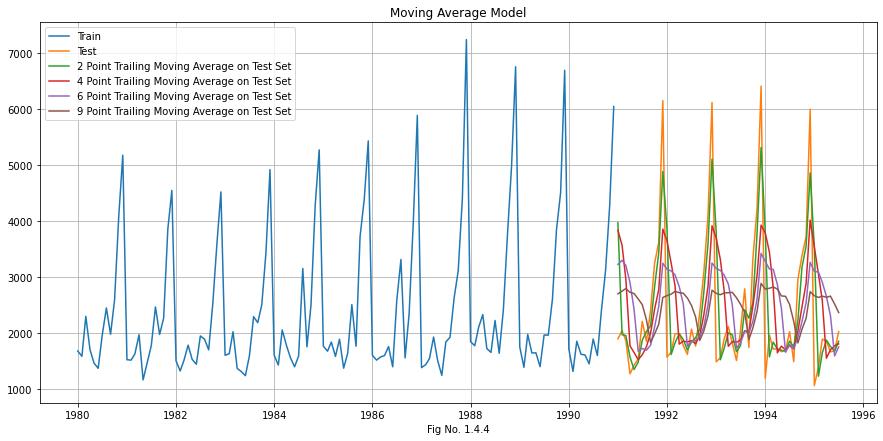

In [50]:
## Plotting on both the Training and Test data

plt.figure(figsize=(15,7))
plt.plot(Moving_Average_Train['Sparkling'], label='Train')
plt.plot(Moving_Average_Test['Sparkling'], label='Test')


plt.plot(Moving_Average_Test['Trailing2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(Moving_Average_Test['Trailing4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(Moving_Average_Test['Trailing6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(Moving_Average_Test['Trailing9'],label = '9 Point Trailing Moving Average on Test Set')
plt.title("Moving Average Model")
plt.xlabel('Fig No. 1.4.4')
plt.legend(loc = 'best')
plt.grid();

### Model Evaluation

In [51]:
rmse_ma_trail2=metrics.mean_squared_error(test['Sparkling'],Moving_Average_Test['Trailing2'],squared=False)
print('For 2 Point Trailing Average RMSE',rmse_ma_trail2)

rmse_ma_trail4=metrics.mean_squared_error(test['Sparkling'],Moving_Average_Test['Trailing4'],squared=False)
print('For 4 Point Trailing Average RMSE',rmse_ma_trail4)

rmse_ma_trail6=metrics.mean_squared_error(test['Sparkling'],Moving_Average_Test['Trailing6'],squared=False)
print('For 6 Point Trailing Average RMSE',rmse_ma_trail6)

rmse_ma_trail9=metrics.mean_squared_error(test['Sparkling'],Moving_Average_Test['Trailing9'],squared=False)
print('For 9 Point Trailing Average RMSE',rmse_ma_trail9)

For 2 Point Trailing Average RMSE 813.4006839972983
For 4 Point Trailing Average RMSE 1156.589694081071
For 6 Point Trailing Average RMSE 1283.9274280129855
For 9 Point Trailing Average RMSE 1346.2783154241804


In [52]:
result_ma=pd.DataFrame({'Test RMSE': [rmse_ma_trail2,rmse_ma_trail4,
                                     rmse_ma_trail6,rmse_ma_trail9]},index=['2 Point Trailing on Test Data','4 Point Trailing on Test Data',
                                                                           '6 Point Trailing on Test Data','9 Point Trailing on Test Data'])

result=pd.concat([result_df1,result_ma])
result

,Test RMSE
RegressionOnTime,1389.135175
NaiveOnTime,3864.279352
SimpleAverage,1275.081804
2 Point Trailing on Test Data,813.400684
4 Point Trailing on Test Data,1156.589694
6 Point Trailing on Test Data,1283.927428
9 Point Trailing on Test Data,1346.278315


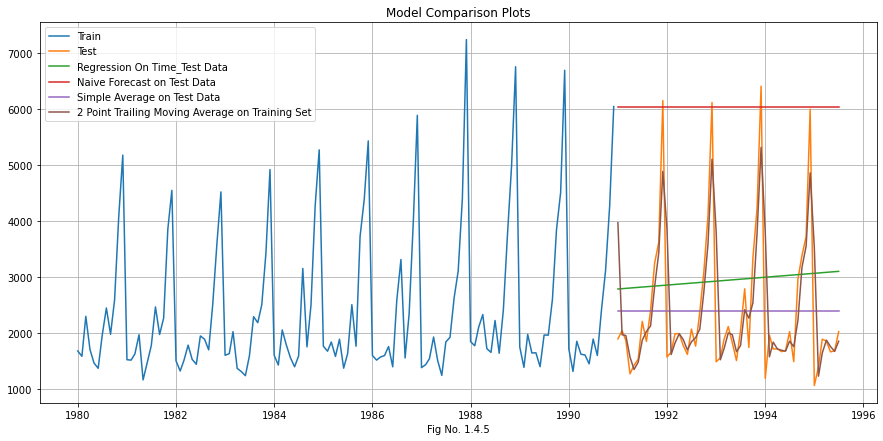

In [53]:
## Plotting on both Training and Test data

plt.figure(figsize=(15,7))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(Naive_Bayes_Test['Naive'], label='Naive Forecast on Test Data')

plt.plot(Simple_Average_Test['Avg'], label='Simple Average on Test Data')

plt.plot(Moving_Average_Test['Trailing2'], label='2 Point Trailing Moving Average on Training Set')
plt.xlabel('Fig No. 1.4.5')

plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Exponential Smoothing
### Simple Exponential Smoothing

In [54]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [55]:
SES_train=train.copy()
SES_test=test.copy()

In [56]:
#creat class
model_SES=SimpleExpSmoothing(train,initialization_method='estimated')
model_SES_fit=model_SES.fit(optimized=True)
model_SES_fit.params

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.07028781460389553,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1763.9269926897714,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [57]:
#prediction
SES_predict=model_SES_fit.forecast(steps=len(test))

In [58]:
SES_predict.head(5)

1991-01-01    2804.662714
1991-02-01    2804.662714
1991-03-01    2804.662714
1991-04-01    2804.662714
1991-05-01    2804.662714
Freq: MS, dtype: float64

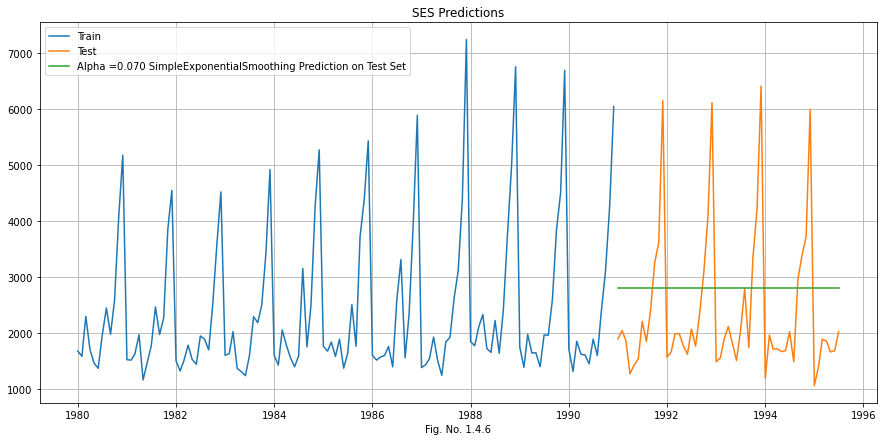

In [59]:
## Plotting on both the Training and Test data

plt.figure(figsize=(15,7))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_predict, label='Alpha =0.070 SimpleExponentialSmoothing Prediction on Test Set')
plt.xlabel('Fig. No. 1.4.6')
plt.legend(loc='best')
plt.grid()
plt.title('SES Predictions');

### Model Evaluation

In [60]:
## Test Data
rmse_SES=metrics.mean_squared_error(test['Sparkling'],SES_predict,squared=False)
rmse_SES_df=pd.DataFrame(rmse_SES,index=['Alpha=0.070 SimpleExponentialSmoothing'],columns=['Test RMSE'])
rmse_SES_df

,Test RMSE
Alpha=0.070 SimpleExponentialSmoothing,1338.004623


### Double Exponential Smoothing

In [61]:
DES_train=train.copy()
DES_test=test.copy()

In [62]:
#creat class
model_DES=Holt(train,initialization_method='estimated')
model_DES_fit=model_DES.fit(optimized=True)
model_DES_fit.params

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.6638769379750992,
 'smoothing_trend': 9.966252219085015e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1502.5681616946074,
 'initial_trend': 29.018019327772173,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [63]:
DES_predict=model_DES_fit.forecast(steps=len(test))

In [64]:
DES_predict.head(5)

1991-01-01    5330.498600
1991-02-01    5359.514827
1991-03-01    5388.531055
1991-04-01    5417.547282
1991-05-01    5446.563509
Freq: MS, dtype: float64

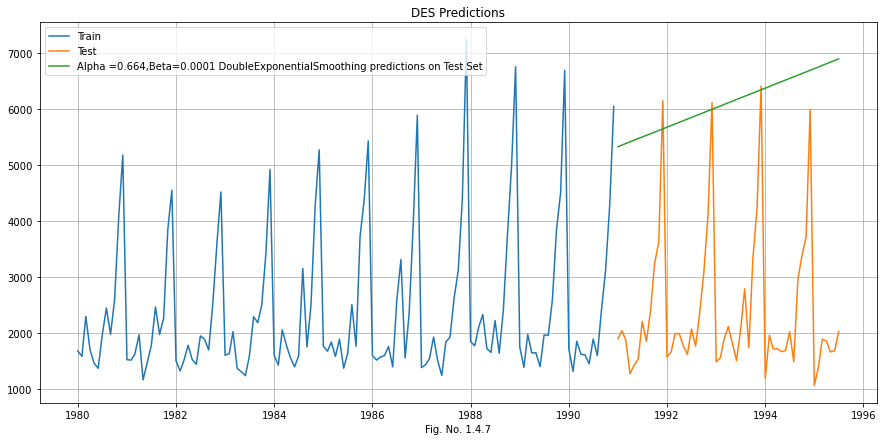

In [65]:
## Plotting on both the Training and Test data

plt.figure(figsize=(15,7))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_predict, label='Alpha =0.664,Beta=0.0001 DoubleExponentialSmoothing predictions on Test Set')
plt.xlabel('Fig. No. 1.4.7')
plt.legend(loc='best')
plt.grid()
plt.title('DES Predictions');

In [66]:
## Test Data
rmse_DES=metrics.mean_squared_error(test['Sparkling'],DES_predict,squared=False)
rmse_DES_df=pd.DataFrame(rmse_DES,index=['Alpha=0.664,B=0.0001 DoubleExponentialSmoothing'],columns=['Test RMSE'])
result_With_DES=pd.concat([rmse_SES_df,rmse_DES_df])
result_With_DES

,Test RMSE
Alpha=0.070 SimpleExponentialSmoothing,1338.004623
"Alpha=0.664,B=0.0001 DoubleExponentialSmoothing",3949.931298


### Triple Exponential Smoothing

In [67]:
TES_train=train.copy()
TES_test=test.copy()

In [68]:
#creat class
model_TES=ExponentialSmoothing(train,trend='additive',seasonal='multiplicative',initialization_method='estimated')
model_TES_fit=model_TES.fit(optimized=True)
model_TES_fit.params

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


{'smoothing_level': 0.11104076314043171,
 'smoothing_trend': 0.049348365324315684,
 'smoothing_seasonal': 0.36232794311434374,
 'damping_trend': nan,
 'initial_level': 2356.510722747615,
 'initial_trend': -9.729116859640436,
 'initial_seasons': array([0.71251887, 0.6830697 , 0.90596553, 0.8058403 , 0.65605007,
        0.65424925, 0.88796426, 1.13391231, 0.91920101, 1.21223812,
        1.87074711, 2.37464156]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [69]:
TES_predict=model_TES_fit.forecast(steps=len(test))

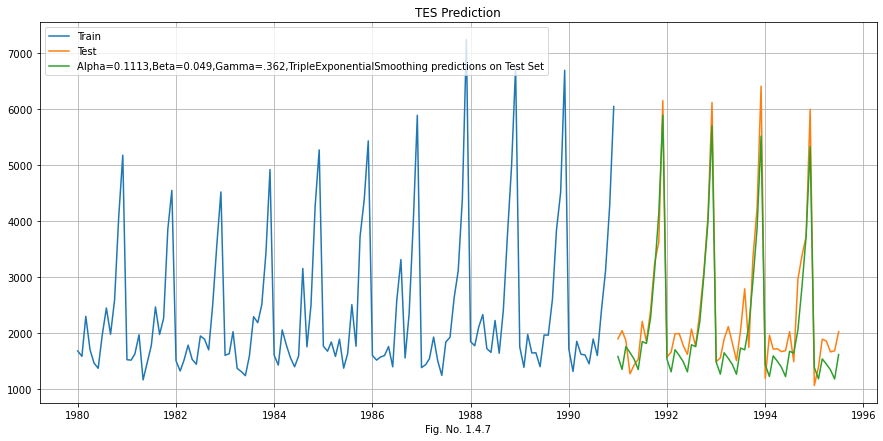

In [70]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(15,7))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_predict, label='Alpha=0.1113,Beta=0.049,Gamma=.362,TripleExponentialSmoothing predictions on Test Set')
plt.xlabel('Fig. No. 1.4.7')
plt.title('TES Prediction')

plt.legend(loc='best')
plt.grid();

In [71]:
## Test Data
rmse_TES=metrics.mean_squared_error(test['Sparkling'],TES_predict,squared=False)
rmse_TES_df=pd.DataFrame(rmse_TES,index=['Alpha=0.1113,B=0.048,Y=.362 TripleExponentialSmoothing'],columns=['Test RMSE'])
result_With_TES=pd.concat([result_With_DES,rmse_TES_df])
result_With_TES

,Test RMSE
Alpha=0.070 SimpleExponentialSmoothing,1338.004623
"Alpha=0.664,B=0.0001 DoubleExponentialSmoothing",3949.931298
"Alpha=0.1113,B=0.048,Y=.362 TripleExponentialSmoothing",403.125867


In [72]:
result_spark=pd.concat([result,result_With_TES])
result_spark

,Test RMSE
RegressionOnTime,1389.135175
NaiveOnTime,3864.279352
SimpleAverage,1275.081804
2 Point Trailing on Test Data,813.400684
4 Point Trailing on Test Data,1156.589694
6 Point Trailing on Test Data,1283.927428
9 Point Trailing on Test Data,1346.278315
Alpha=0.070 SimpleExponentialSmoothing,1338.004623
"Alpha=0.664,B=0.0001 DoubleExponentialSmoothing",3949.931298
"Alpha=0.1113,B=0.048,Y=.362 TripleExponentialSmoothing",403.125867


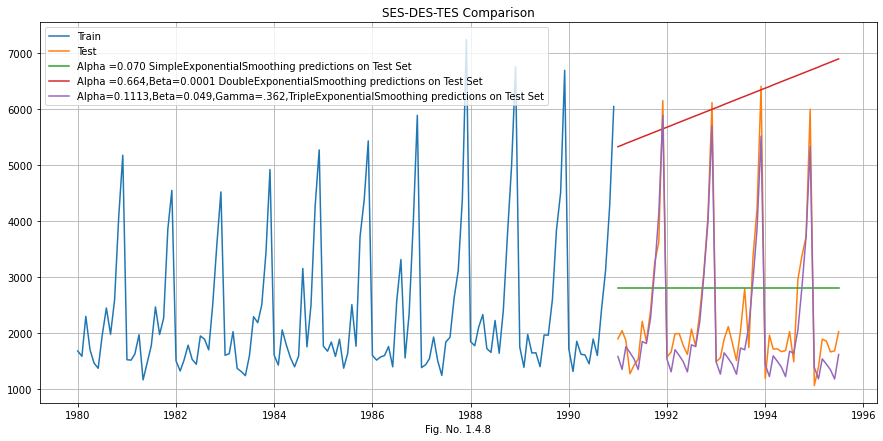

In [73]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(15,7))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(SES_predict, label='Alpha =0.070 SimpleExponentialSmoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha =0.664,Beta=0.0001 DoubleExponentialSmoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.1113,Beta=0.049,Gamma=.362,TripleExponentialSmoothing predictions on Test Set')

plt.xlabel('Fig. No. 1.4.8')
plt.title('SES-DES-TES Comparison')
plt.legend(loc='best')
plt.grid();

## Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [74]:
from statsmodels.tsa.stattools import adfuller
sparktest = adfuller(spark['Sparkling'],regression='ct',autolag='t-stat')
print('Sparkling Data test statistic is %3.3f' %sparktest[0])
print('Sparkling Data test p-value is' ,sparktest[1])
print('Number of lags used' ,sparktest[2])
print('Number of Observation Used',sparktest[3])
print('Critical Values',sparktest[4])

Sparkling Data test statistic is -1.650
Sparkling Data test p-value is 0.7721785247131912
Number of lags used 11
Number of Observation Used 175
Critical Values {'1%': -4.011455293061225, '5%': -3.4358815193469385, '10%': -3.141957196268222}


We see that at 5% significant level the Time Series is non-stationary.

There are various ways that Python allows us to select the appropriate number of lags at which we check whether the Time Series is stationary. To know more about the how to select the various ways, please refer to the link over $\href{https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html}{here}$.

Let us take one level of differencing to see whether the series becomes stationary.

In [75]:
sparktest = adfuller(spark['Sparkling'].diff().dropna(),regression='ct',autolag='t-stat')
print('Sparkling Data test statistic is %3.3f' %sparktest[0])
print('Sparkling Data test p-value is' ,sparktest[1])
print('Number of lags used' ,sparktest[2])
print('Number of Observation Used',sparktest[3])
print('Critical Values',sparktest[4])

Sparkling Data test statistic is -44.912
Sparkling Data test p-value is 0.0
Number of lags used 10
Number of Observation Used 175
Critical Values {'1%': -4.011455293061225, '5%': -3.4358815193469385, '10%': -3.141957196268222}


In [76]:
spark1=spark.copy()

In [77]:
spark1['Differencing']=spark.diff()

In [78]:
spark1.head()

,Sparkling,Differencing
YearMonth,,
1980-01-01,1686,NaN
1980-02-01,1591,-95.0
1980-03-01,2304,713.0
1980-04-01,1712,-592.0
1980-05-01,1471,-241.0


Text(0.5, 0, 'Fig. No. 1.5.1')

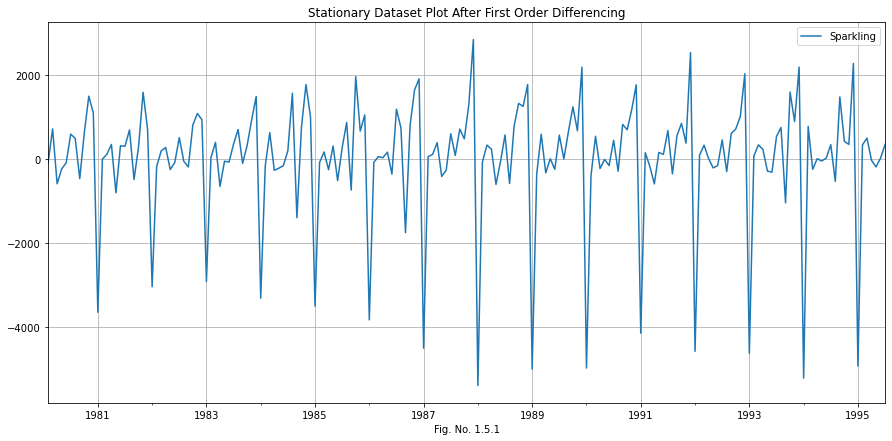

In [79]:
spark.diff().dropna().plot(grid=True)
plt.title('Stationary Dataset Plot After First Order Differencing')
plt.xlabel('Fig. No. 1.5.1')

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [80]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

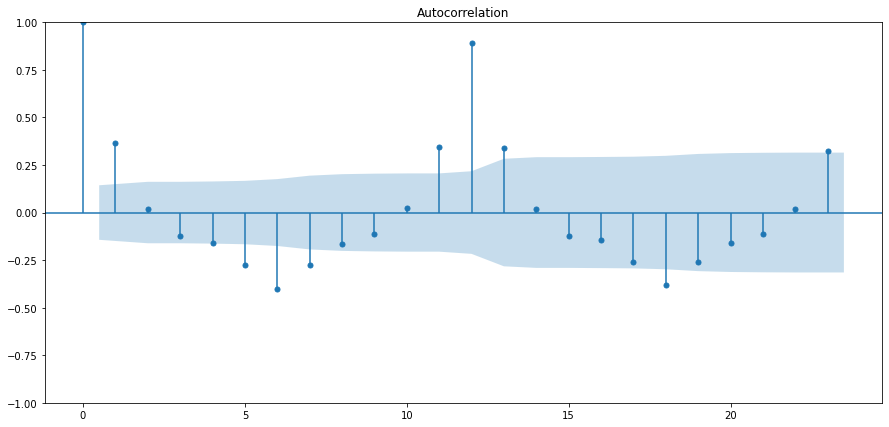

In [81]:
plot_acf(spark,alpha=0.05);

From the above plots, we can say that there seems to be a seasonality in the data.

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


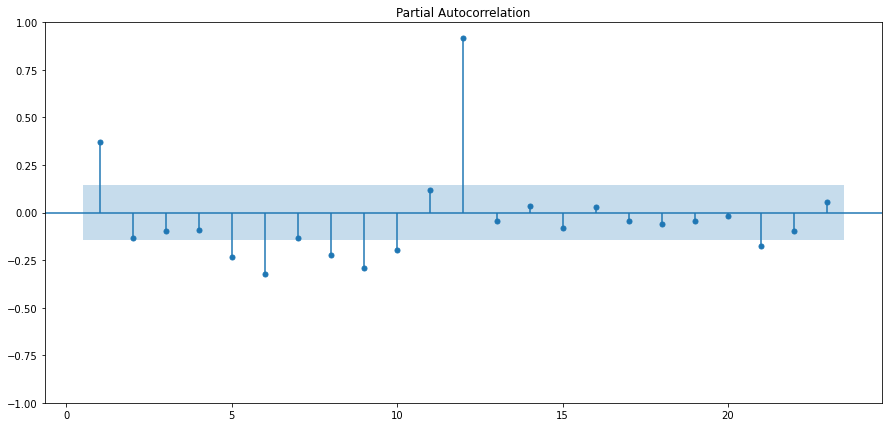

In [82]:
plot_pacf(spark,zero=False,alpha=0.05);

In [83]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [84]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


Last few rows of Training Data


,Sparkling
YearMonth,
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116
1990-11-01,4286
1990-12-01,6047


First few rows of Test Data


,Sparkling
YearMonth,
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432


Last few rows of Test Data


,Sparkling
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


In [85]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


## Check for stationarity of the Training Data Time Series.

Let us plot the training data once.

Text(0.5, 0, 'Fig. No. 1.5.2')

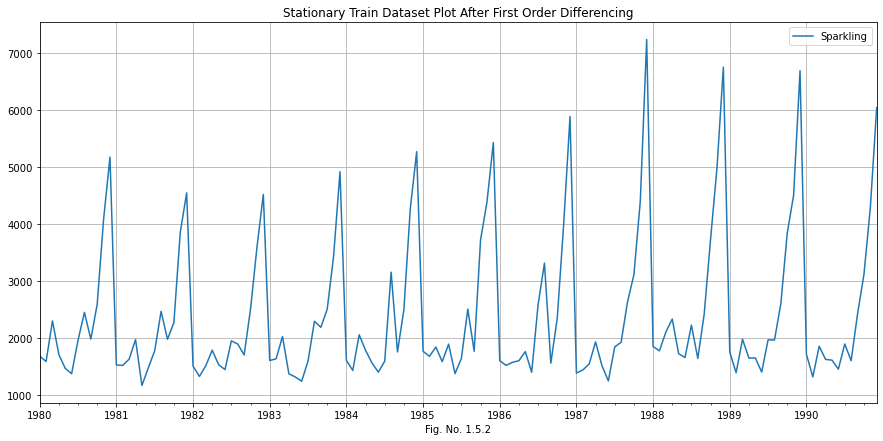

In [86]:
train.plot(grid=True);
plt.title('Stationary Train Dataset Plot After First Order Differencing')
plt.xlabel('Fig. No. 1.5.2')

In [87]:
dftest = adfuller(train,regression='ct')
print('Train Dataset test statistic is %3.3f' %dftest[0])
print('Train Dataset test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

Train Dataset test statistic is -2.062
Train Dataset test p-value is 0.5674110388593653
Number of lags used 12


The training data is non-stationary at 95% confidence level. Let us take a first level of differencing to stationarize the Time Series.

In [88]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('Train Dataset test statistic is %3.3f' %dftest[0])
print('Train Dataset test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

Train Dataset test statistic is -7.968
Train Dataset test p-value is 8.479210655515968e-11
Number of lags used 11


Now, let us go ahead and plot the differenced training data.

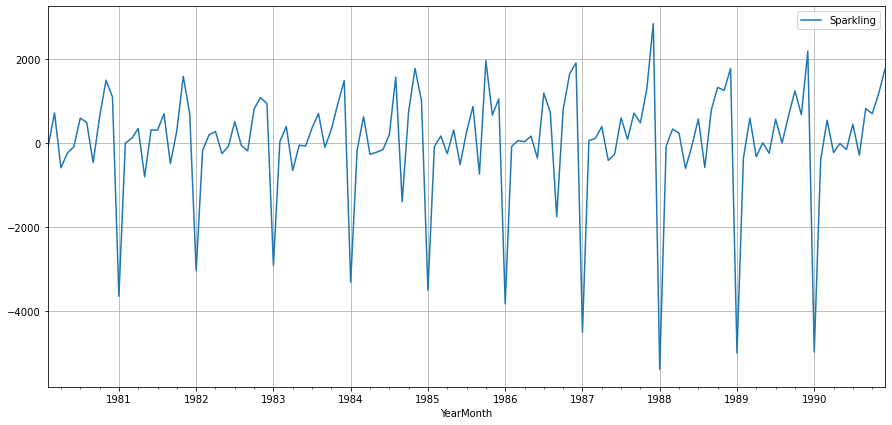

In [89]:
train.diff().dropna().plot(grid=True);

In [90]:
import warnings
warnings.filterwarnings('ignore')

## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [91]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [92]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [93]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.0600155918632
ARIMA(0, 1, 2) - AIC:2234.4083231261075
ARIMA(0, 1, 3) - AIC:2233.994857744824
ARIMA(1, 1, 0) - AIC:2266.6085393190097
ARIMA(1, 1, 1) - AIC:2235.755094667831
ARIMA(1, 1, 2) - AIC:2234.527200450751
ARIMA(1, 1, 3) - AIC:2235.6078120179973
ARIMA(2, 1, 0) - AIC:2260.36574396809
ARIMA(2, 1, 1) - AIC:2233.7776262791913
ARIMA(2, 1, 2) - AIC:2213.5092126455716
ARIMA(2, 1, 3) - AIC:2232.88532807025
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.4986804429436
ARIMA(3, 1, 2) - AIC:2230.7680276952296
ARIMA(3, 1, 3) - AIC:2221.4585826409516


In [94]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head(5)

,param,AIC
10,"(2, 1, 2)",2213.509213
15,"(3, 1, 3)",2221.458583
14,"(3, 1, 2)",2230.768028
11,"(2, 1, 3)",2232.885328
9,"(2, 1, 1)",2233.777626


In [95]:
auto_ARIMA = ARIMA(train, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 19 Feb 2023   AIC                           2213.509
Time:                        22:20:42   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.215      0.0

Diagnostics plot.

Text(0.5, 0, 'Fig No. 1.6.1')

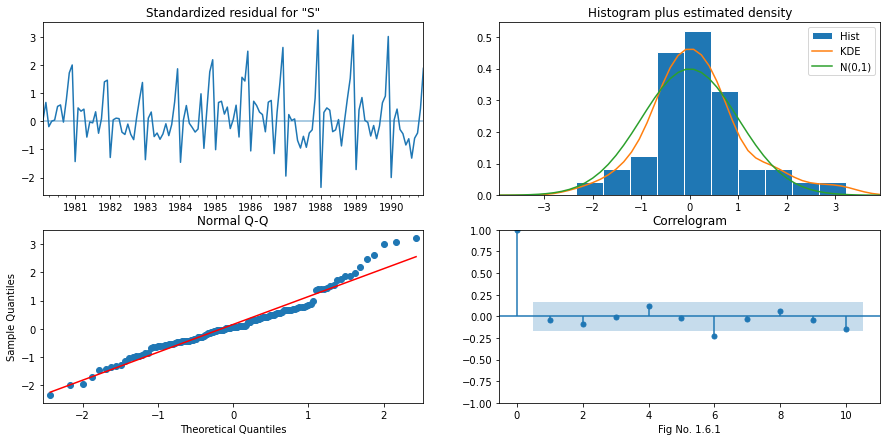

In [96]:
results_auto_ARIMA.plot_diagnostics();
plt.xlabel('Fig No. 1.6.1')

## Predict on the Test Set using this model and evaluate the model.

In [97]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [98]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [99]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1299.9784010221538 
MAPE: 47.0998657498007


In [100]:
resultsDf = pd.DataFrame({'Test RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA Auto(2,1,2)'])

resultsDf

,Test RMSE,MAPE
"ARIMA Auto(2,1,2)",1299.978401,47.099866


## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots once more.

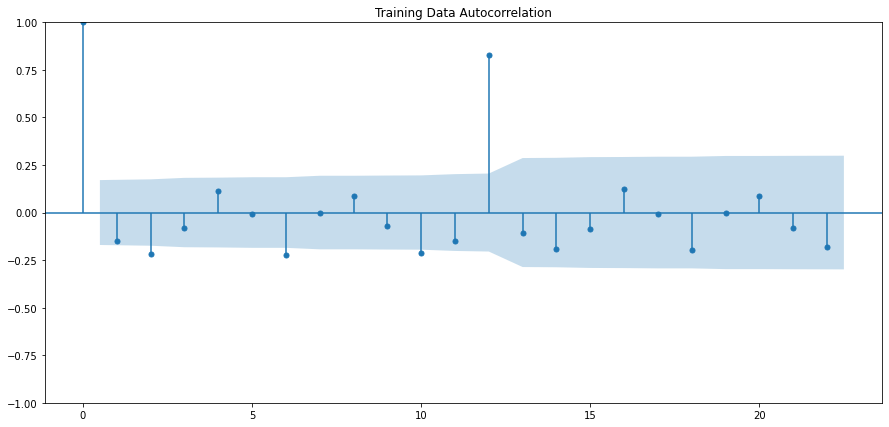

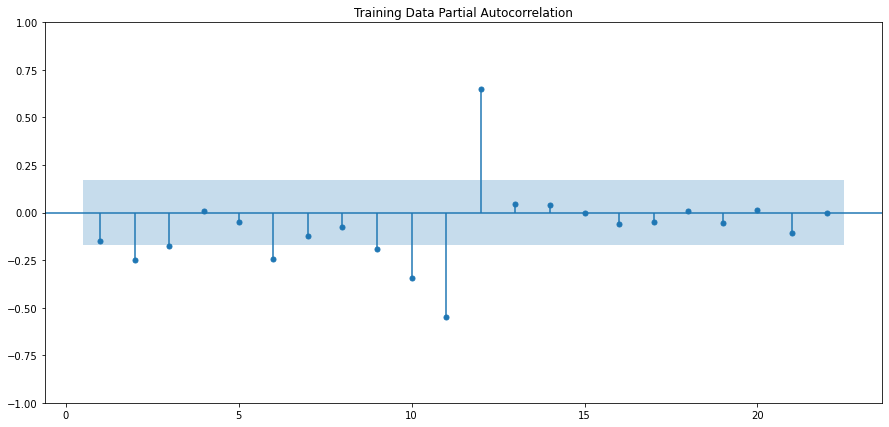

In [101]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop',alpha=0.05)
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,alpha=0.05,method='ywmle')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 3.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 2.

By looking at the above plots, we will take the value of p and q to be 3 and 1 respectively.

In [102]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(3,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1109.384
Date:                Sun, 19 Feb 2023   AIC                           2230.768
Time:                        22:20:48   BIC                           2248.019
Sample:                    01-01-1980   HQIC                          2237.778
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4343      0.043    -10.215      0.000      -0.518      -0.351
ar.L2          0.3284      0.109      3.003      0.003       0.114       0.543
ar.L3         -0.2373      0.067     -3.550      0.0

Let us analyse the residuals from the various diagnostics plot.

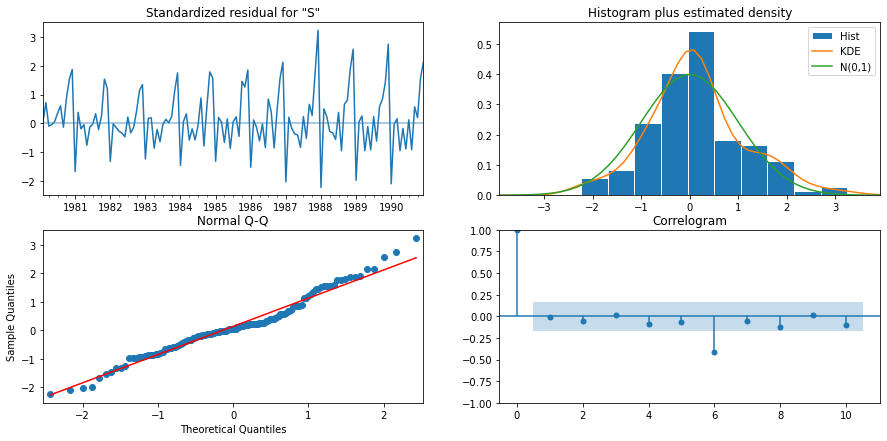

In [103]:
results_manual_ARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [104]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [105]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1280.1805666892953 
MAPE: 43.4710260542446


In [106]:
temp_resultsDf1 = pd.DataFrame({'Test RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA Manual(3,1,2)'])


temp_resultsDf1

,Test RMSE,MAPE
"ARIMA Manual(3,1,2)",1280.180567,43.471026


## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

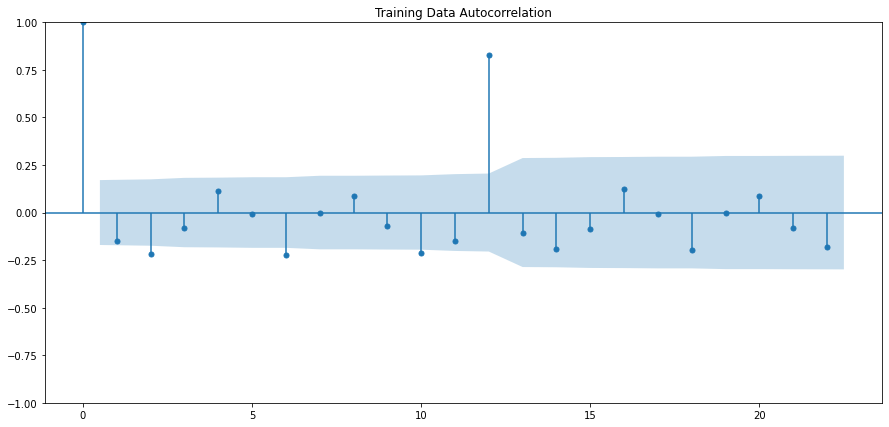

In [107]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

We can see that there is a seasonality.

In [108]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [109]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [110]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.261461684497
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640238222
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456677
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389124
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791728
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158614405
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920733
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850582
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.768864956641
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572970303
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838202
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193782776
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1319653044425
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.675195417812
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245085272948
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018824674342
SARIMA(0, 1, 2

In [111]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
50,"(1, 1, 2)","(1, 0, 2, 12)",1555.584248
53,"(1, 1, 2)","(2, 0, 2, 12)",1555.934563
26,"(0, 1, 2)","(2, 0, 2, 12)",1557.121564
23,"(0, 1, 2)","(1, 0, 2, 12)",1557.160507
77,"(2, 1, 2)","(1, 0, 2, 12)",1557.340403


In [112]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -769.967
Date:                            Sun, 19 Feb 2023   AIC                           1555.935
Time:                                    22:27:25   BIC                           1577.090
Sample:                                01-01-1980   HQIC                          1564.505
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6380      0.287     -2.226      0.026      -1.200      -0.076
ma.L1         -0.3049      0.185   

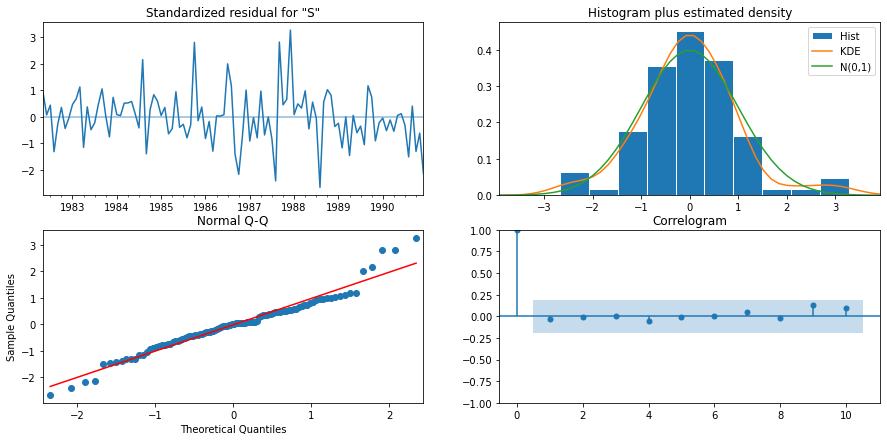

In [113]:
results_auto_SARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [114]:
predicted_auto_SARIMA = results_auto_SARIMA.forecast(steps=len(test))

In [115]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_SARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 546.5252906647245 
MAPE: 21.94855633570714


In [116]:
temp_resultsDf2 = pd.DataFrame({'Test RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA Auto(1,1,2)(2,0,2,12)'])


temp_resultsDf2

,Test RMSE,MAPE
"SARIMA Auto(1,1,2)(2,0,2,12)",546.525291,21.948556


## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.

Let us look at the ACF and the PACF plots once more.

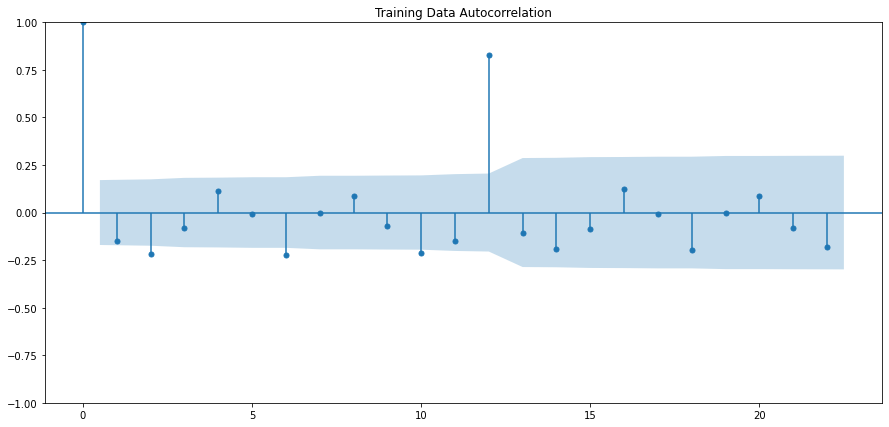

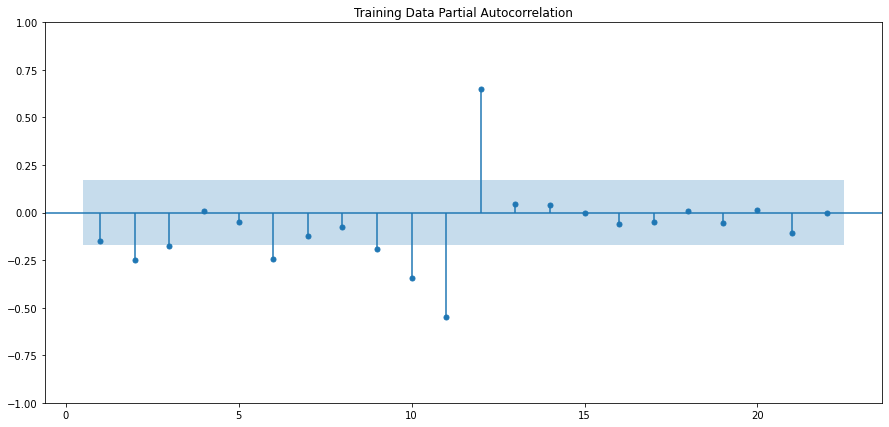

In [117]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 3 or its multiple e.g. 6.
We are taking the p value to be 3 and the q value also to be 2 as the parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 3. 
* The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 2.

Remember to check the ACF and the PACF plots only at multiples of 3 (since 3 is the seasonal period).

Please do refer to $\href{https://online.stat.psu.edu/stat510/lesson/4/4.1}{this\ link}$ to read more about Seasonal Auto-Regressive Integrtaed Moving Average Models.

In [118]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(3,1,2),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                      SARIMAX Results                                       
Dep. Variable:                            Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -855.683
Date:                              Sun, 19 Feb 2023   AIC                           1727.365
Time:                                      22:27:37   BIC                           1749.394
Sample:                                  01-01-1980   HQIC                          1736.307
                                       - 12-01-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6465      0.291     -2.218      0.027      -1.218      -0.075
ar.L2         -0.05

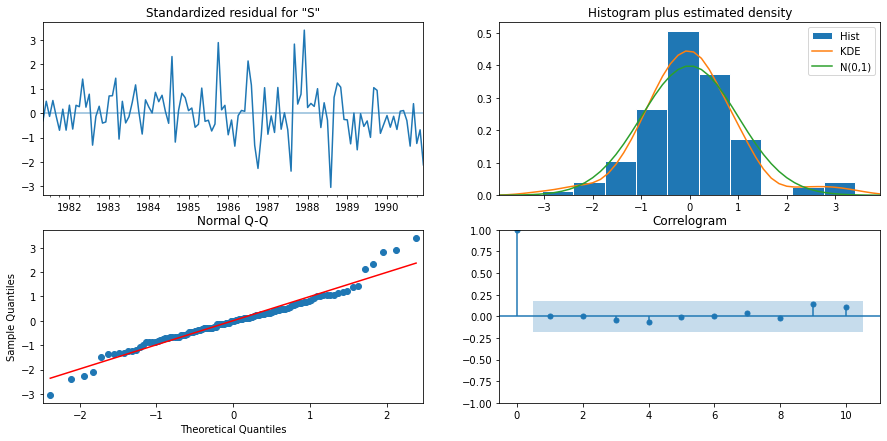

In [119]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [120]:
predicted_manual_SARIMA = results_manual_SARIMA.forecast(steps=len(test))

In [121]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_SARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 613.2944584236456 
MAPE: 26.492732788778923


In [122]:
temp_resultsDf3 = pd.DataFrame({'Test RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA Manual(3,1,2)(1,0,1,12)'])


temp_resultsDf3

,Test RMSE,MAPE
"SARIMA Manual(3,1,2)(1,0,1,12)",613.294458,26.492733


In [123]:
ARIMA_SARIMA=pd.concat([resultsDf,temp_resultsDf1,temp_resultsDf2,temp_resultsDf3])
ARIMA_SARIMA

,Test RMSE,MAPE
"ARIMA Auto(2,1,2)",1299.978401,47.099866
"ARIMA Manual(3,1,2)",1280.180567,43.471026
"SARIMA Auto(1,1,2)(2,0,2,12)",546.525291,21.948556
"SARIMA Manual(3,1,2)(1,0,1,12)",613.294458,26.492733


In [124]:
complete=pd.concat([result_spark,ARIMA_SARIMA])
complete

,Test RMSE,MAPE
RegressionOnTime,1389.135175,NaN
NaiveOnTime,3864.279352,NaN
SimpleAverage,1275.081804,NaN
2 Point Trailing on Test Data,813.400684,NaN
4 Point Trailing on Test Data,1156.589694,NaN
6 Point Trailing on Test Data,1283.927428,NaN
9 Point Trailing on Test Data,1346.278315,NaN
Alpha=0.070 SimpleExponentialSmoothing,1338.004623,NaN
"Alpha=0.664,B=0.0001 DoubleExponentialSmoothing",3949.931298,NaN
"Alpha=0.1113,B=0.048,Y=.362 TripleExponentialSmoothing",403.125867,NaN


This is where our model building exercise ends. 

Please do try out with a different seasonal frequency parameter (if that works) and check whether that gives you a better RMSE value. Also, try taking different kinds of transformations as well.

## Building the most optimum model on the Full Data.

Here, we have a scenario where our training data was stationary but our full data was not stationary. So, we will use the same parameters as our training data but with adding a level of differencing which is needed for the data to be stationary.

In [125]:
full_data_model = sm.tsa.statespace.SARIMAX(spark['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 12)   Log Likelihood               -1172.687
Date:                            Sun, 19 Feb 2023   AIC                           2361.373
Time:                                    22:28:01   BIC                           2385.925
Sample:                                01-01-1980   HQIC                          2371.343
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6537      0.269     -2.429      0.015      -1.181      -0.126
ma.L1         -0.2792      0.222   

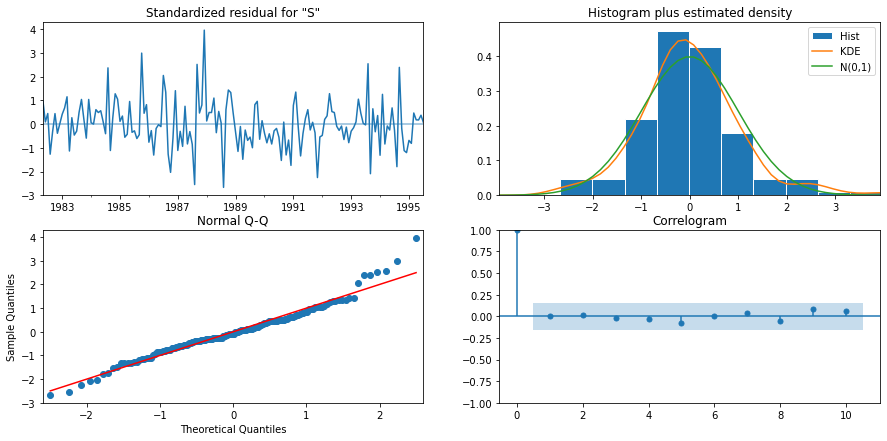

In [126]:
results_full_data_model.plot_diagnostics();

## Evaluate the model on the whole data and predict 12 months into the future (till the end of next year).

In [127]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [128]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,1857.427486,381.051255,1110.580751,2604.274221
1995-09-01,2457.734230,386.001579,1701.185038,3214.283422
1995-10-01,3317.337542,386.109844,2560.576153,4074.098931
1995-11-01,4019.020897,387.889381,3258.771681,4779.270113
1995-12-01,6289.809158,387.950185,5529.440768,7050.177548
1996-01-01,1238.557303,388.863774,476.398311,2000.716294
1996-02-01,1547.431249,389.105695,784.798102,2310.064397
1996-03-01,1813.891225,389.736531,1050.021662,2577.760789
1996-04-01,1787.927133,390.091608,1023.361630,2552.492635
1996-05-01,1628.724763,390.616997,863.129517,2394.320010


In [129]:
rmse = mean_squared_error(spark['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 536.2035019000679


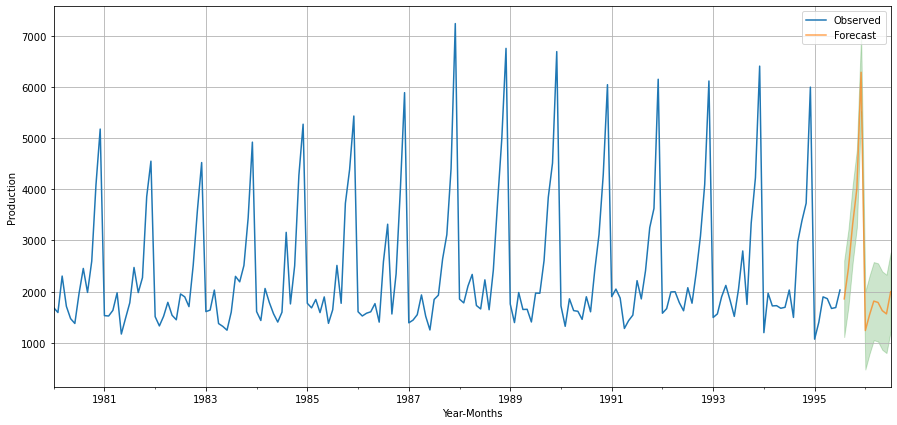

In [130]:
# plot the forecast along with the confidence band

axis = spark['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast',alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='green',alpha=0.2)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Production')
plt.legend(loc='best')
plt.grid()
plt.show();
